# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [3]:
n=x + 2*y + 3*z
print(n)

[5 7]


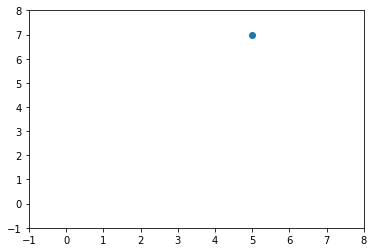

In [4]:
plt.scatter(n[0],n[1])
plt.ylim(-1, 8)
plt.xlim(-1, 8)
plt.show()

In [5]:
 #x, y и x, z.

(-1, 2.5)

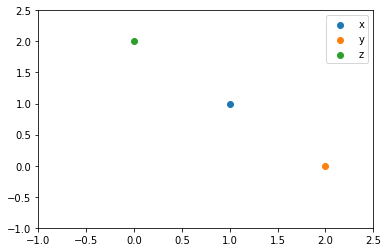

In [6]:
plt.scatter(x[0],x[1])
plt.scatter(y[0],y[1])
plt.scatter(z[0],z[1])
plt.legend(['x','y','z'])
plt.ylim(-1, 2.5)
plt.xlim(-1, 2.5)

In [9]:
#x, y и x, z

xy = x - y
xz = x - z

cosine_angle = np.dot(xy, xz) / (np.linalg.norm(xy) * np.linalg.norm(xz))
angle = np.arccos(cosine_angle)

print (np.degrees(angle))

179.99999879258172


## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

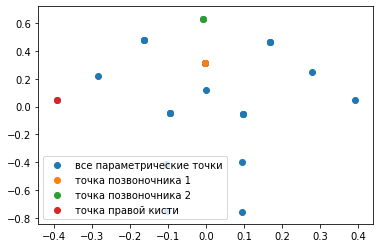

In [10]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])
plt.scatter(df.x, df.y)
plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[21], df.y[21])
plt.legend(['все параметрические точки', 'точка позвоночника 1','точка позвоночника 2', 'точка правой кисти'])

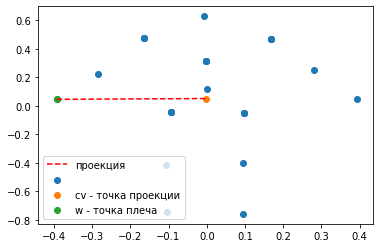

In [11]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
# вектор w - вектор плеча
w = np.array([df.x[21],df.y[21]])

# строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', '', 'cv - точка проекции', 'w - точка плеча'])


In [12]:
print('расстояние от кисти до линии позвоночника ', linalg.norm(cv - w))

расстояние от кисти до линии позвоночника  0.38940416891982127


# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [13]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [14]:
from numpy import linalg as LA

e_vals, e_vecs = LA.eig(m1)
print('Исходная матрица: \n', m1)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [15]:
e_vals, e_vecs = LA.eig(m2)
print('Исходная матрица: \n', m2)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.57735027 -0.81649658  0.15430335]
 [-0.57735027  0.40824829  0.6172134 ]
 [ 0.57735027 -0.40824829  0.77151675]]
Собственные значения:  [6. 3. 3.]
